In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib as mpl
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen, add_image
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from highlight_text import ax_text, fig_text
from PIL import Image
from mplsoccer import add_image
from urllib.request import urlopen
import os


# Print the modified DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

green = '#69f900'
red = '#ff4b44'
blue = '#00a0de'
violet = '#a369ff'
bg_color= '#f5f5f5'
line_color= '#000000'
col1 = '#ff4b44'
col2 = '#00a0de'

In [2]:
df = pd.read_csv("D:\FData\LaLiga_2023-24\GW1_to_GW_38combinded.csv")

In [39]:
df = pd.read_csv("D:\FData\EPL_2023-24\EPL_2023\EPL_2023_2024GW01_to_GW38.csv")

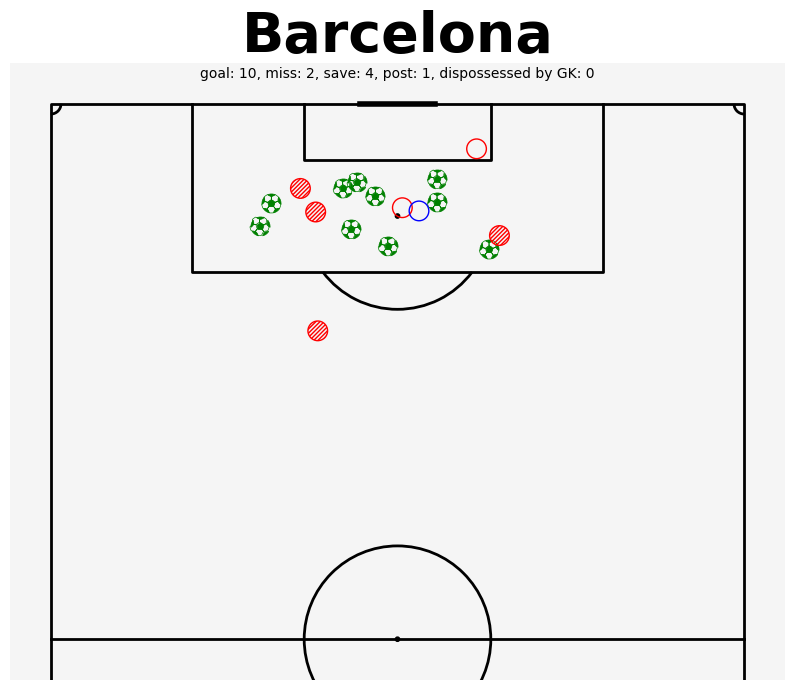

In [3]:
def plot_one_on_one(ax, team_name):
    dft = df[df['teamName']==team_name]
    ooo = dft[dft['qualifiers'].str.contains('OneOnOne')]
    goal = ooo[ooo['type']=='Goal']
    save = ooo[ooo['type']=='SavedShot']
    miss = ooo[ooo['type']=='MissedShots']
    post = ooo[ooo['type']=='ShotOnPost']
    chms = ooo[ooo['type']=='ChanceMissed']

    pitch = VerticalPitch(pitch_type='uefa', pitch_color=bg_color, line_color=line_color, linewidth=2, corner_arcs=True, half=True)
    pitch.draw(ax=ax)

    pitch.scatter(goal.x, goal.y, s=200, c='None', edgecolors='g', marker='football', ax=ax)
    pitch.scatter(save.x, save.y, s=200, c='None', edgecolors='r', hatch='////////', ax=ax)
    pitch.scatter(miss.x, miss.y, s=200, c='None', edgecolors='r', ax=ax)
    pitch.scatter(post.x, post.y, s=200, c='None', edgecolors='b', ax=ax)
    pitch.scatter(chms.x, chms.y, s=200, c='magenta', edgecolors='None', ax=ax)
    
    ax.set_title(f'{team_name}', fontsize=40, fontweight='bold')
    ax.text(34, 108, f'goal: {len(goal)}, miss: {len(miss)}, save: {len(save)}, post: {len(post)}, dispossessed by GK: {len(chms)}', ha='center', va='center')
    
    return

fig,ax=plt.subplots(figsize=(10,10))
plot_one_on_one(ax, 'Barcelona')

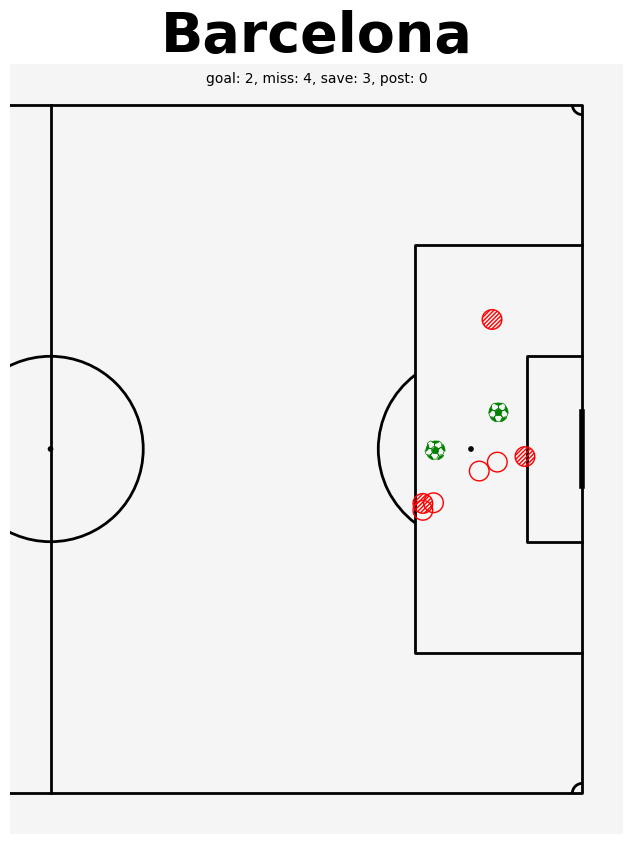

In [26]:
def plot_one_on_one(ax, team_name):
    dft = df[df['oppositionTeamName']==team_name]
    ooo = dft[dft['qualifiers'].str.contains('OneOnOne')]
    goal = ooo[ooo['type']=='Goal']
    save = ooo[ooo['type']=='SavedShot']
    miss = ooo[ooo['type']=='MissedShots']
    post = ooo[ooo['type']=='ShotOnPost']
    chms = ooo[ooo['type']=='ChanceMissed']

    pitch = Pitch(pitch_type='uefa', pitch_color=bg_color, line_color=line_color, linewidth=2, corner_arcs=True, half=True)
    pitch.draw(ax=ax)

    pitch.scatter(goal.x, goal.y, s=200, c='None', edgecolors='g', marker='football', ax=ax)
    pitch.scatter(save.x, save.y, s=200, c='None', edgecolors='r', hatch='////////', ax=ax)
    pitch.scatter(miss.x, miss.y, s=200, c='None', edgecolors='r', ax=ax)
    pitch.scatter(post.x, post.y, s=200, c='None', edgecolors='b', ax=ax)
    pitch.scatter(chms.x, chms.y, s=200, c='magenta', edgecolors='None', ax=ax)
    
    ax.set_title(f'Against {team_name}', fontsize=40, fontweight='bold')
    ax.text(78.75, 70.5, f'goal: {len(goal)}, miss: {len(miss)}, save: {len(save)}, post: {len(post)}', ha='center', va='center')
    
    return

fig,ax=plt.subplots(figsize=(10,10))
plot_one_on_one(ax, 'Barcelona')

In [41]:
def chane_miss_stats(team_name):
    cm = df[(df['teamName']==team_name) & (df['type']=='ChanceMissed')]

    return {'Team_Name': team_name, 'ChanceMissed': len(cm)}

teams = df['teamName'].unique()

list = []
for team_name in teams:
    stats = chane_miss_stats(team_name)
    list.append(stats)

chane_miss_stats_df = pd.DataFrame(list)
chane_miss_stats_df = chane_miss_stats_df.sort_values(by='ChanceMissed', ascending=False).reset_index(drop=True)
chane_miss_stats_df

,Team_Name,ChanceMissed
0,Brentford,3
1,Man Utd,3
2,Brighton,2
3,Aston Villa,1
4,Burnley,1
5,West Ham,1
6,Man City,1
7,Luton,1
8,Sheff Utd,1
9,Liverpool,1


In [35]:
def one_on_one_stats(team_name):
    dft = df[df['teamName']==team_name]
    ooo = dft[dft['qualifiers'].str.contains('OneOnOne')]
    goal = ooo[ooo['type']=='Goal']
    save = ooo[ooo['type']=='SavedShot']
    miss = ooo[ooo['type']=='MissedShots']
    post = ooo[ooo['type']=='ShotOnPost']
    chms = ooo[ooo['type']=='ChanceMissed']

    ax.text(78.75, 70.5, f'goal: {len(goal)}, miss: {len(miss)}, save: {len(save)}, post: {len(post)}', ha='center', va='center')
    
    return {
        'Team_Name': team_name,
        'Total_one_v_one': len(goal)+len(save)+len(miss)+len(post)+len(chms),
        'Goals_scored': len(goal),
        'Shots_Saved': len(save),
        'Shot_Off_Target': len(miss),
        'Hit_Post': len(post),
        'Dispossessed_by_GK': len(chms)
    }

teams = df['teamName'].unique()

list = []
for team_name in teams:
    stats = one_on_one_stats(team_name)
    list.append(stats)

ovo_stats_df = pd.DataFrame(list)
ovo_stats_df = ovo_stats_df.sort_values(by='Total_one_v_one', ascending=False).reset_index(drop=True)
ovo_stats_df

,Team_Name,Total_one_v_one,Goals_scored,Shots_Saved,Shot_Off_Target,Hit_Post,Dispossessed_by_GK
0,Barcelona,17,10,4,2,1,0
1,Valencia,15,6,3,5,0,1
2,Villarreal,13,3,7,2,0,1
3,Real Madrid,13,6,4,2,0,1
4,Atletico,11,4,6,1,0,0
5,Sevilla,10,1,5,3,1,0
6,Las Palmas,10,3,6,1,0,0
7,Getafe,9,3,6,0,0,0
8,Girona,9,4,2,2,1,0
9,Real Betis,9,2,3,4,0,0


In [36]:
def one_on_one_against_stats(team_name):
    dft = df[df['oppositionTeamName']==team_name]
    ooo = dft[dft['qualifiers'].str.contains('OneOnOne')]
    goal = ooo[ooo['type']=='Goal']
    save = ooo[ooo['type']=='SavedShot']
    miss = ooo[ooo['type']=='MissedShots']
    post = ooo[ooo['type']=='ShotOnPost']
    chms = ooo[ooo['type']=='ChanceMissed']

    ax.text(78.75, 70.5, f'goal: {len(goal)}, miss: {len(miss)}, save: {len(save)}, post: {len(post)}', ha='center', va='center')
    
    return {
        'Team_Name': team_name,
        'Total_one_v_one_Faced': len(goal)+len(save)+len(miss)+len(post)+len(chms),
        'Goals_conceded': len(goal),
        'Shots_Saved': len(save),
        'Opponent_Missed': len(miss),
        'Opponent_Hit_Post': len(post),
        'Dispossessed_by_GK': len(chms)
    }

teams = df['oppositionTeamName'].unique()

list = []
for team_name in teams:
    stats = one_on_one_against_stats(team_name)
    list.append(stats)

ovo_against_stats_df = pd.DataFrame(list)
ovo_against_stats_df = ovo_against_stats_df.sort_values(by='Shots_Saved', ascending=False).reset_index(drop=True)
ovo_against_stats_df

,Team_Name,Total_one_v_one_Faced,Goals_conceded,Shots_Saved,Opponent_Missed,Opponent_Hit_Post,Dispossessed_by_GK
0,Granada,14,4,8,2,0,0
1,Sevilla,18,3,8,5,2,0
2,Las Palmas,13,2,6,3,0,2
3,Real Betis,13,7,5,0,1,0
4,Athletic Club,7,1,4,1,1,0
5,Real Sociedad,8,1,4,3,0,0
6,Valencia,6,1,4,1,0,0
7,Celta Vigo,9,5,3,1,0,0
8,Girona,6,2,3,1,0,0
9,Mallorca,4,1,3,0,0,0
